# Project Overview

In this project, we aim to predict house prices using the **"House Sales in King County, USA"** dataset, spanning from **May 2014 to May 2015**. The process will begin with data gathering, followed by data assessment, cleaning, and exploratory data analysis (EDA) to understand the dataset’s structure and identify meaningful patterns. This stage will help prepare the data for building a predictive model.

The primary focus will be on using the **Random Forest** **algorithm**, a powerful ensemble learning method, for price prediction. Random Forest is well-suited for this task due to its ability to handle both numerical and categorical data, its resilience to overfitting, and its capacity to model complex relationships. After model training, we will evaluate its performance using key metrics like **MAE, MSE**, and **R-squared**, while also fine-tuning hyperparameters to enhance prediction accuracy. The ultimate goal is to create a model that provides accurate house price predictions for real estate applications.

# Install the Libraries

In [1]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
# Mount Google Drive to access the file
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Final_Mock_Interview_Jyoti_Tidke/house_prices.csv'
df = pd.read_csv(file_path)

# Preview the dataset
pd.set_option('display.max_columns', None)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- **id**: A unique identifier for each home sale.
- **date**: Date the house was sold.
- **price**: The sale price of the home in USD.
- **bedrooms**: Number of bedrooms in the house.
- **bathrooms**: Number of bathrooms in the house.
- **sqft_living**: Square footage of the home.
- **sqft_lot**: Square footage of the lot.
- **floors**: Total floors (levels) in the house.
- **waterfront**: Whether the house has a view of a waterfront.
- **view**: An index from 0 to 4 representing the quality of the view, with 0 being no view and 4 being a very good view.
- **condition**: The overall condition of the house.
- **grade**: The overall grade of the housing unit based on King County's grading system.
- **sqft_above**: Square footage of the house excluding the basement.
- **sqft_basement**: Square footage of the basement.
- **yr_built**: The year the house was built.
- **yr_renovated**: The year the house was renovated.
- **zipcode**: The ZIP code of the house.
- **lat**: Latitude coordinate of the house.
- **long**: Longitude coordinate of the house.
- **sqft_living15**: The average square footage of interior living space for the 15 nearest neighbors.
- **sqft_lot15**: The average square footage of the land lots for the 15 nearest neighbors.


# Data Inspection and Feature Engineering

In [3]:
# Check the basic structure
print("Shape of dataset:", df.shape)
print("\nColumns and Data Types:\n")
print(df.dtypes)

# Check for missing values
print("\nMissing Values per Column:\n")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Shape of dataset: (21613, 21)

Columns and Data Types:

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view               int64
condition         object
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Missing Values per Column:

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15  

In [4]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,21450,NaN,14031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,0.234303,NaN,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,0.766318,NaN,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,0.000000,NaN,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,0.000000,NaN,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,0.000000,NaN,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,NaN,0.000000,NaN,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

In [6]:
# Convert 'waterfront' column: 'Y' -> 1, 'N' -> 0
df['waterfront'] = df['waterfront'].map({'Y': 1, 'N': 0})

In [7]:
# Ordinal encoding for 'condition'
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

df['condition'] = df['condition'].map(condition_mapping)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the 'zipcode' column
df['zipcode_encoded'] = encoder.fit_transform(df['zipcode'])

# Check the encoded values
print(df[['zipcode', 'zipcode_encoded']].head())

   zipcode  zipcode_encoded
0    98178               66
1    98125               55
2    98028               16
3    98136               58
4    98074               37


In [9]:
# Use 2015 as the reference year (latest in the dataset)
reference_year = 2015
df['house_age'] = reference_year - df['yr_built']
df['yrs_since_renovation'] = reference_year - df['yr_renovated']
df['yrs_since_renovation'] = df['yrs_since_renovation'].where(df['yr_renovated'] != 0, 0)
# Create 'is_renovated' column: 1 if renovated, 0 if not
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [10]:
# Check the updated dataframe
print(df[['house_age', 'is_renovated', 'yrs_since_renovation']].head())

   house_age  is_renovated  yrs_since_renovation
0         60             0                     0
1         64             1                    24
2         82             0                     0
3         50             0                     0
4         28             0                     0


In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week,zipcode_encoded,house_age,yrs_since_renovation,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,0,66,60,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,1,55,64,24,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,2,16,82,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,1,58,50,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,2,37,28,0,0


In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'day_of_week', 'zipcode_encoded', 'house_age', 'yrs_since_renovation',
       'is_renovated'],
      dtype='object')

# Data Vizualisation & Handling Outliers

In [13]:
# List of all columns, including 'price' for correlation calculation
num_cols = [
    'price',
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
    'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
    'day_of_week', 'zipcode_encoded', 'house_age', 'yrs_since_renovation',
    'is_renovated'
]

# Calculate correlations with the target variable 'price'
corr_matrix = df[num_cols].corr()
price_corr = corr_matrix['price'].sort_values(ascending=False)

# Print the correlation with price
print("Correlation with 'price':\n", price_corr)

# Filter out features with low correlation with price and low variance
selected_num_cols = price_corr[price_corr.abs() > 0.2].index.tolist()  # You can adjust the threshold (0.2) based on your preference

# Print the selected numerical columns for the model
print("Selected numerical columns for model building:", selected_num_cols)

Correlation with 'price':
 price                   1.000000
sqft_living             0.702035
grade                   0.667434
sqft_above              0.605567
sqft_living15           0.585379
bathrooms               0.525138
view                    0.397293
sqft_basement           0.323816
bedrooms                0.308350
lat                     0.307003
waterfront              0.266369
floors                  0.256794
yr_renovated            0.126434
is_renovated            0.126092
sqft_lot                0.089661
sqft_lot15              0.082447
yrs_since_renovation    0.069467
yr_built                0.054012
condition               0.036362
long                    0.021626
year                    0.003576
day_of_week            -0.001695
month                  -0.010081
day                    -0.014670
zipcode_encoded        -0.050889
zipcode                -0.053203
house_age              -0.054012
Name: price, dtype: float64
Selected numerical columns for model building: ['price

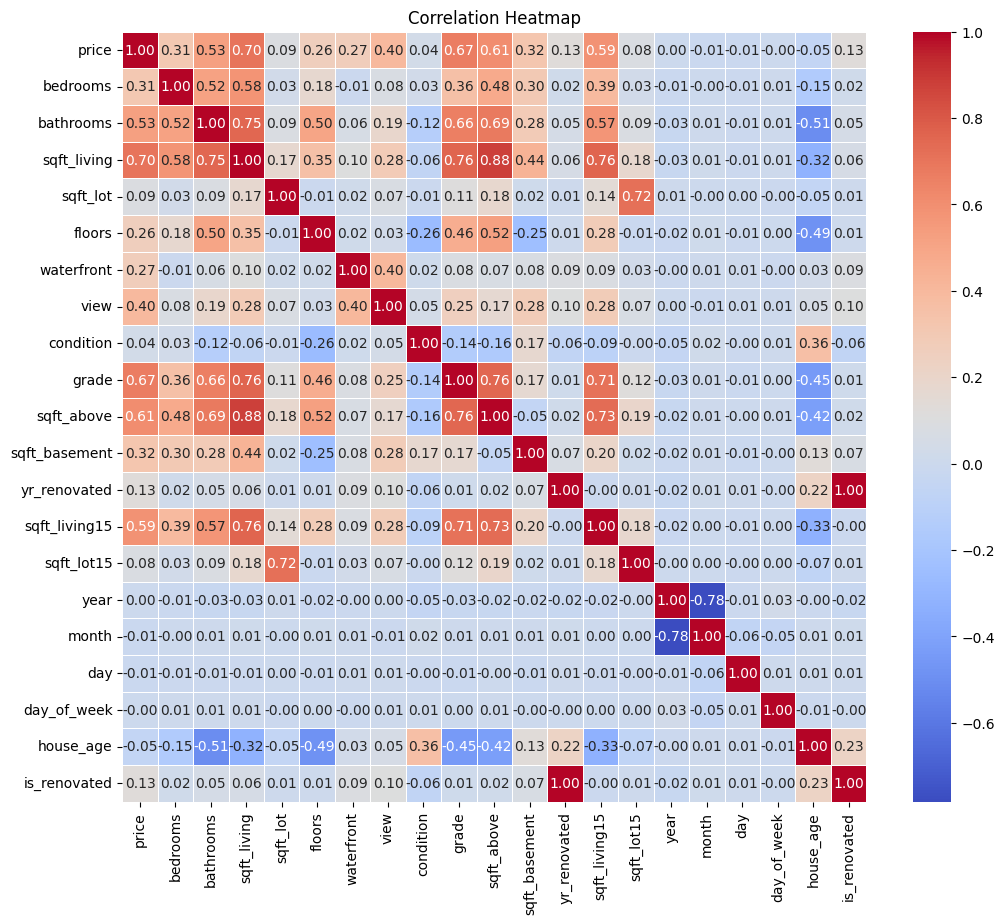

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of numerical columns
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_renovated', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'day_of_week',
    'house_age', 'is_renovated'
]

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

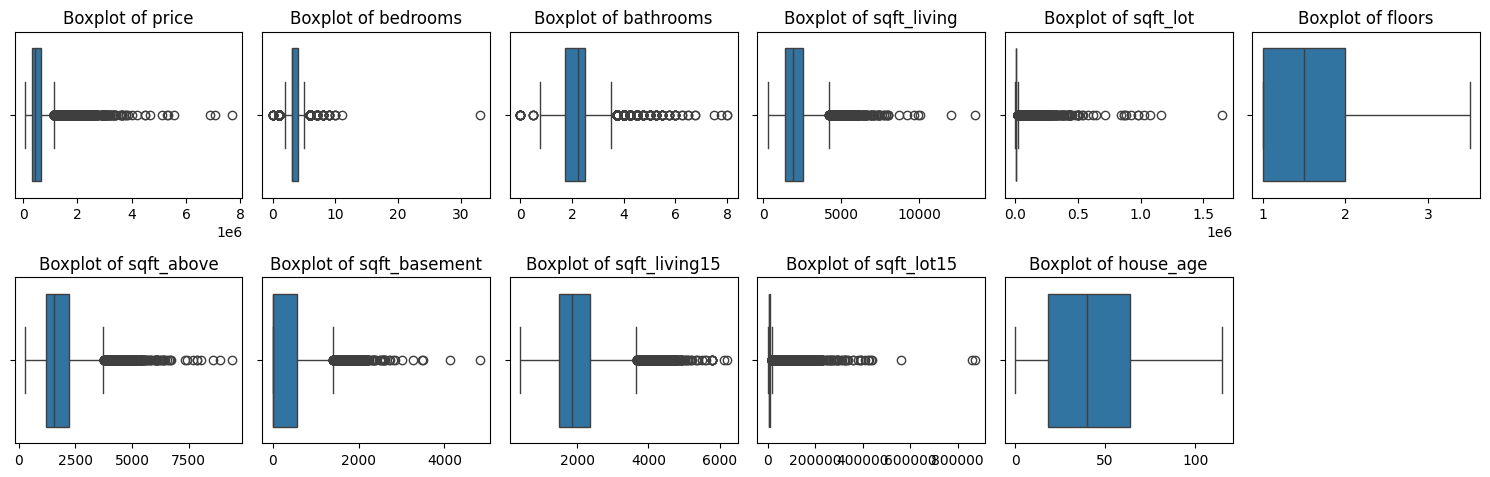

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot for outliers
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'house_age'
]

# Boxplots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)  # Adjust grid size as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')  # Remove x-axis label for neatness
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase the gap between subplots
plt.tight_layout()
plt.show()

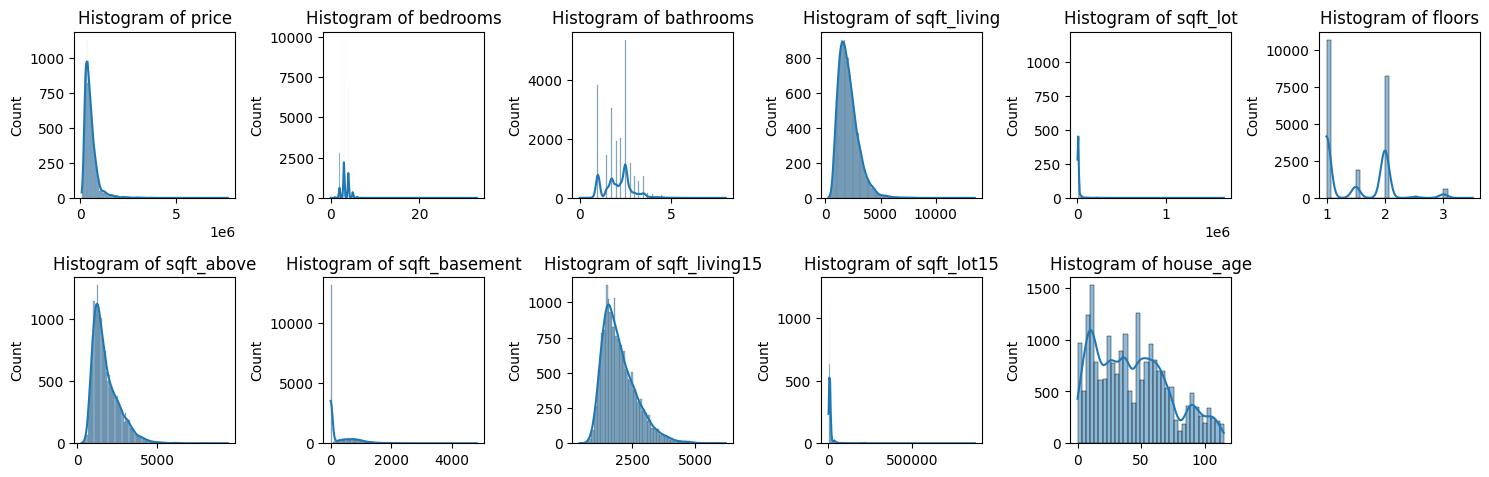

In [16]:
# Histograms for distribution
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('')  # Remove x-axis label for neatness
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase the gap between subplots
plt.tight_layout()
plt.show()

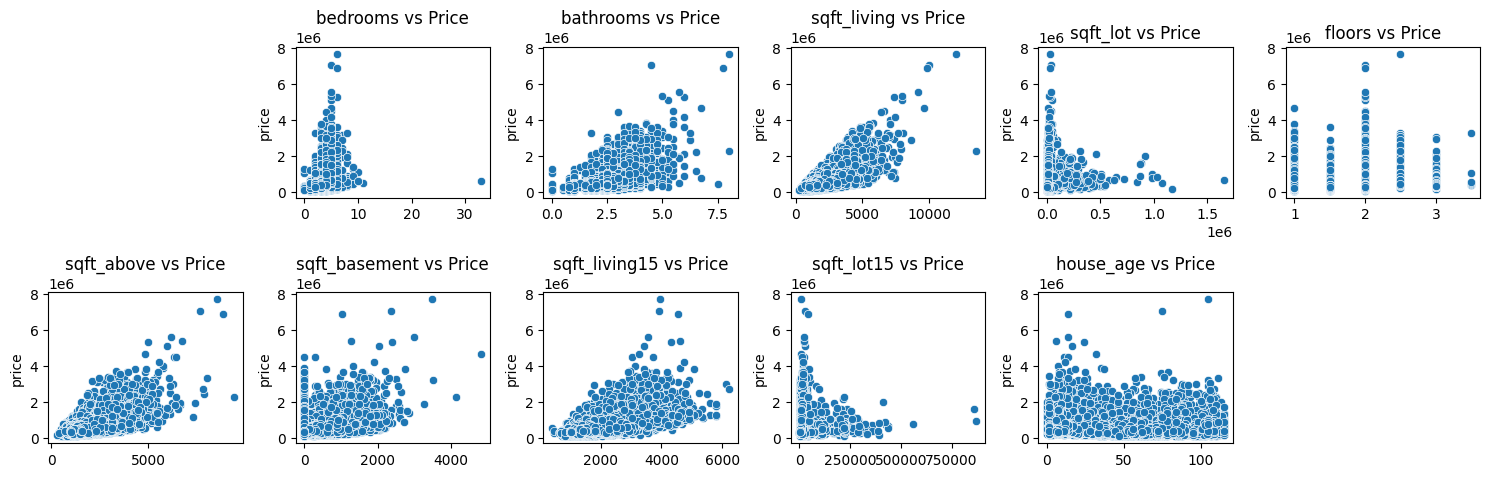

In [17]:
# Scatter Plots (for relationships between price and features)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    if col != 'price':  # Scatter plot with price (ignore 'price' vs. 'price')
        plt.subplot(5, 6, i)
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'{col} vs Price')
        plt.xlabel('')  # Remove x-axis label for neatness
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase the gap between subplots
plt.tight_layout()
plt.show()

In [18]:
# Define the numerical columns for outlier detection
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'house_age'
]

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Display the shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_filtered.shape}")

Original dataset shape: (21613, 29)
Dataset shape after removing outliers: (17186, 29)


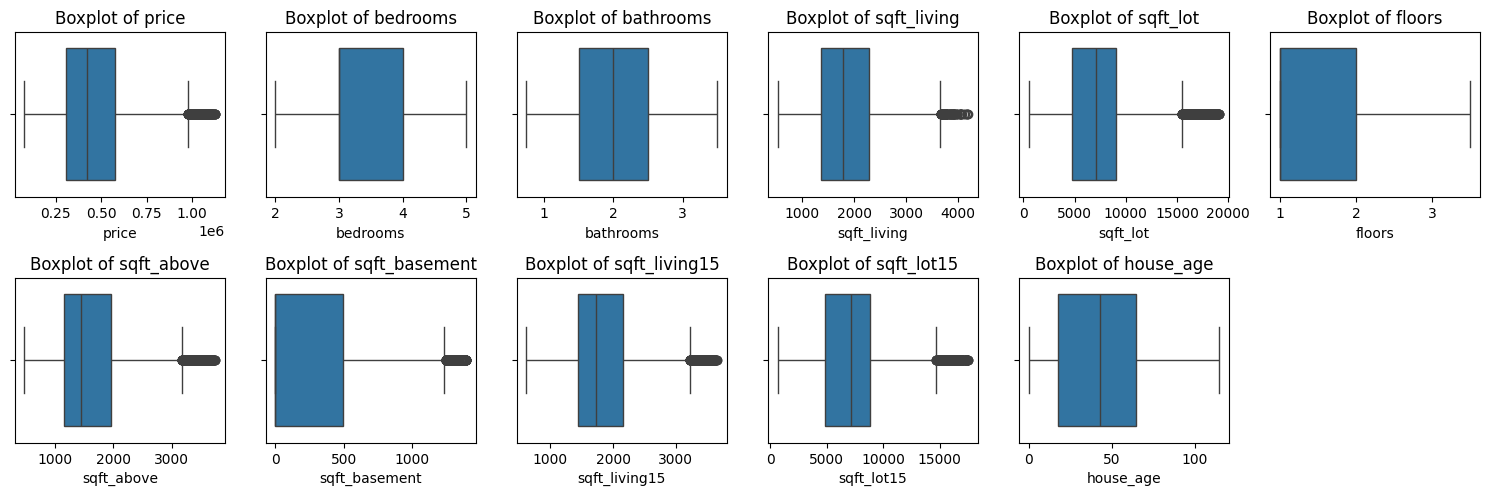

In [19]:
# List of numerical columns to plot for outliers in the new dataframe after removing outliers
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'house_age'
]

# Boxplots for outlier detection in the cleaned data
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)  # Adjust grid size as needed
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

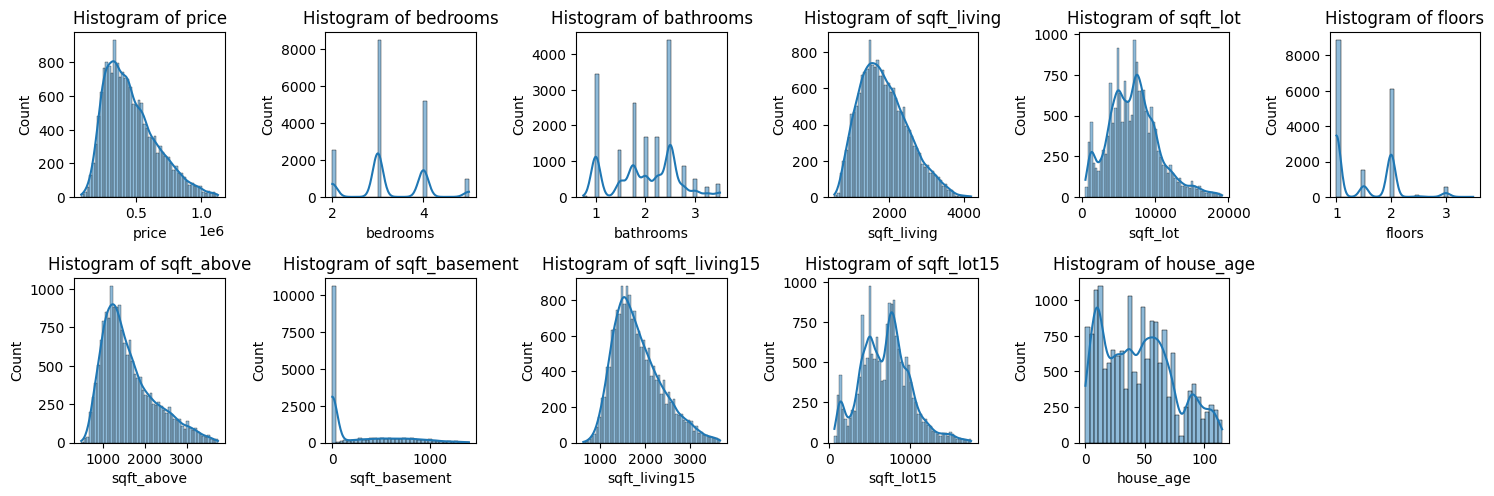

In [20]:
# Histograms for distribution after removing outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)  # Adjust grid size as needed
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

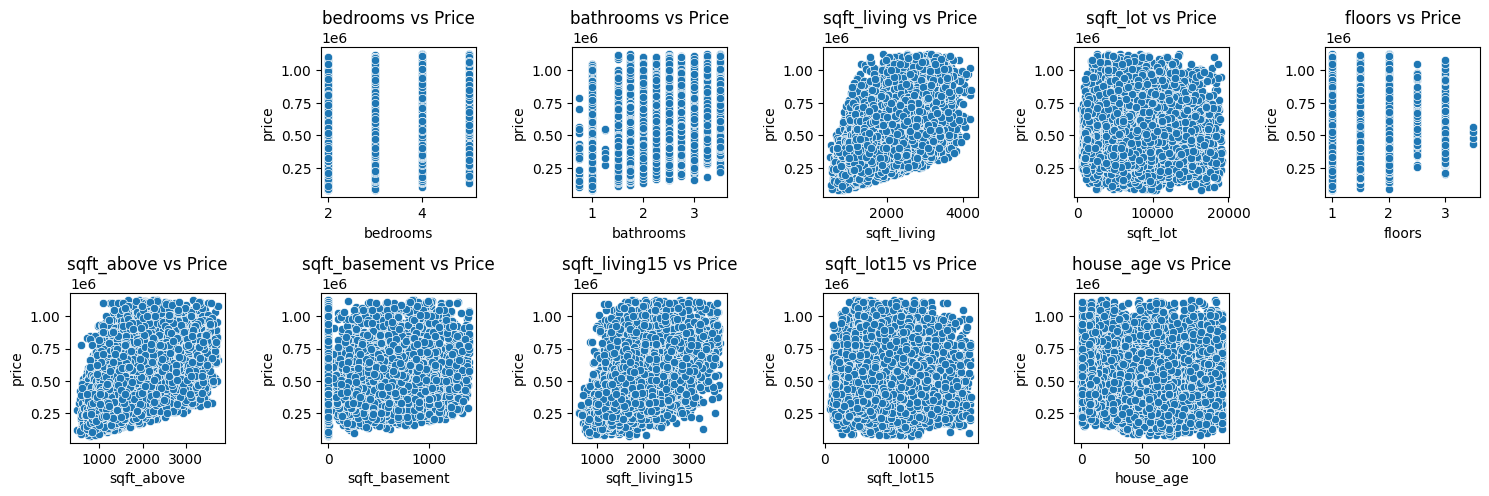

In [21]:
# Scatter Plots (for relationships between price and features) after removing outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    if col != 'price':  # Scatter plot with price (ignore 'price' vs. 'price')
        plt.subplot(5, 6, i)
        sns.scatterplot(x=df_filtered[col], y=df_filtered['price'])
        plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

In [22]:
# Drop the specified columns from df_filtered
df_filtered = df_filtered.drop(columns=['id', 'date', 'zipcode', 'zipcode_encoded', 'yr_renovated', 'yrs_since_renovation', 'yr_built','day', 'day_of_week'])

# Check the remaining columns after dropping
print(df_filtered.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month', 'house_age', 'is_renovated'],
      dtype='object')


# Model Building Random Forest

In [23]:
# Separate features and target
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [24]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13748, 19)
X_test shape: (3438, 19)
y_train shape: (13748,)
y_test shape: (3438,)


In [25]:
# Initialize the RandomForestRegressor model with a fixed random state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data (X_train for features and y_train for target)
rf_model.fit(X_train, y_train)

# Use the trained model to predict the target variable (house prices) on the test data (X_test)
y_pred = rf_model.predict(X_test)

# Calculate the Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 50783.156203461316
MSE: 5542109733.817112
RMSE: 74445.34729462354
R-squared: 0.8539803169788325


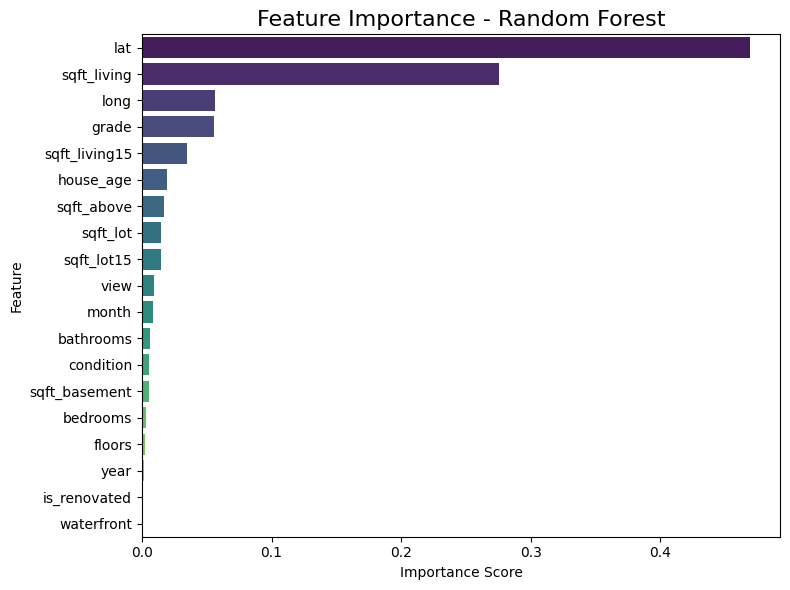

In [26]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance (high to low)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot it
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [27]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

In [28]:
# Create Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_absolute_error'
)

In [29]:
# Fit on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [30]:
print(grid_search.best_params_)

{'max_depth': 20, 'n_estimators': 200}


# Predict and Evaluate the tuned model



In [31]:
# Best Model
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 50576.492365511076
MSE: 5475873409.931847
RMSE: 73999.14465675835
R-squared: 0.8557254659352304


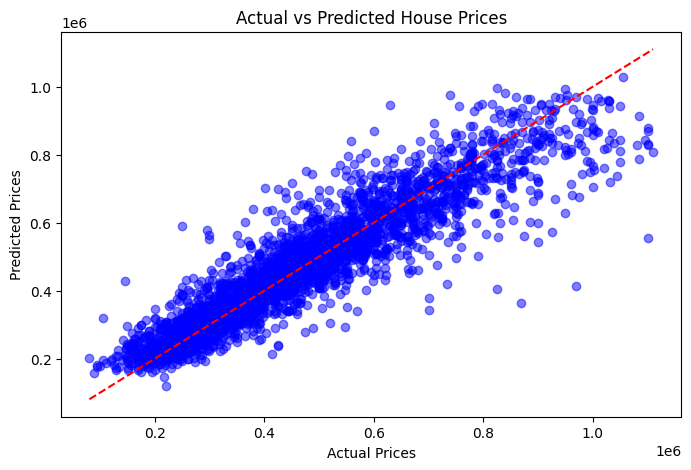

In [32]:
# Plotting the Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Save the Model

In [33]:
import joblib
joblib.dump(best_rf, '/content/drive/MyDrive/Final_Mock_Interview_Jyoti_Tidke/best_rf_model.pkl')

['/content/drive/MyDrive/Final_Mock_Interview_Jyoti_Tidke/best_rf_model.pkl']